In [1]:
#importing imp libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
#sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading the dataset

data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [7]:
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [8]:
data['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [9]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [10]:
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [11]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


senior citizen is categorical column so percentile is not relavant.

75% customers having tenure less than 55 months.

average monthly charges are 64.76 whereas 25% customer pay more than 89.85

No     5174
Yes    1869
Name: Churn, dtype: int64

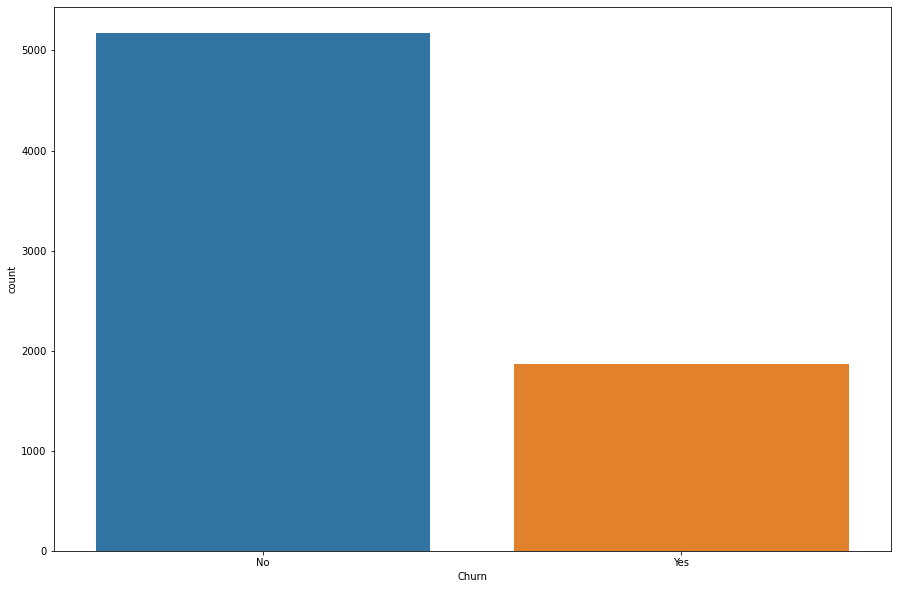

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(data['Churn'])
data['Churn'].value_counts()

Data is highly imbalanced.

we will balance it later.

The ratio % of churn is 73:27

In [14]:
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors='coerce')

In [15]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

total charges having nulls values which initially giving no null and showing object type which was not.

In [16]:
data.loc[data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


so from 7043 records only 11 having nulls which is very low in % there will be minimal dataloss but this will be ok. So deleting null rows.

In [17]:
data.dropna(how='any',inplace=True)

In [18]:
data.shape

(7032, 21)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


now total charges column showing float type. good to go .

In [20]:
categ=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

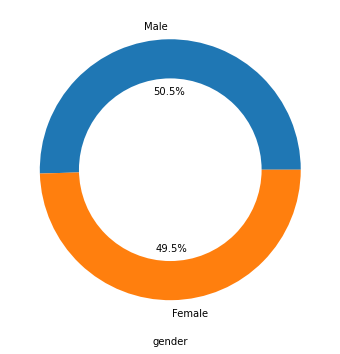

<Figure size 432x288 with 0 Axes>

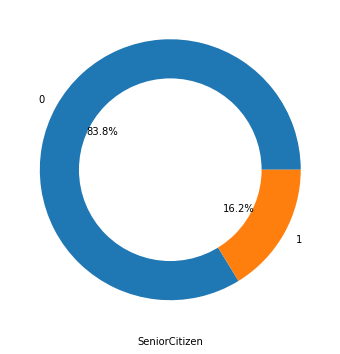

<Figure size 432x288 with 0 Axes>

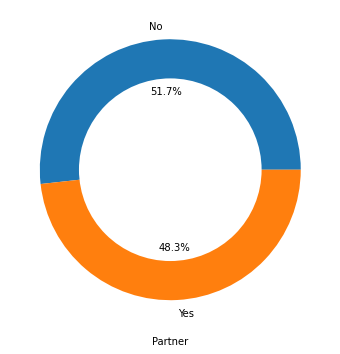

<Figure size 432x288 with 0 Axes>

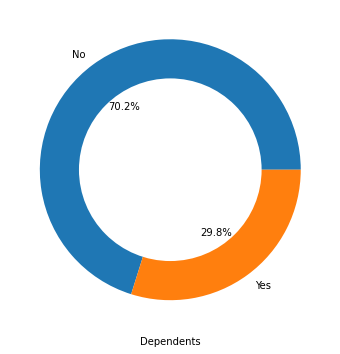

<Figure size 432x288 with 0 Axes>

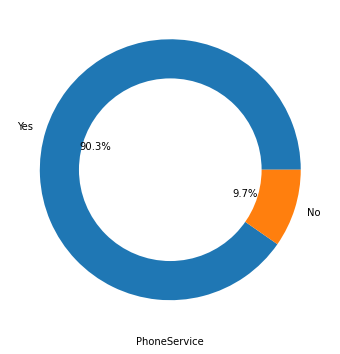

<Figure size 432x288 with 0 Axes>

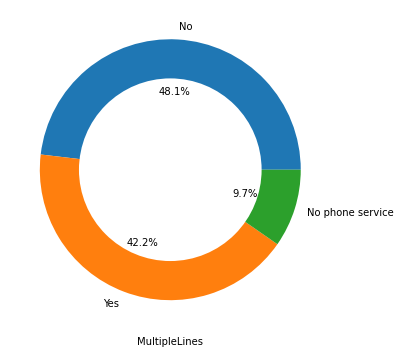

<Figure size 432x288 with 0 Axes>

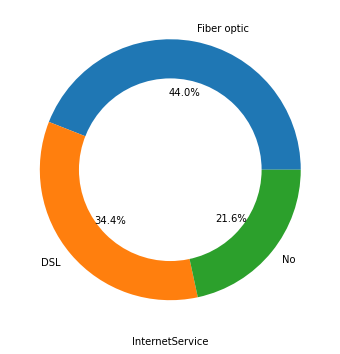

<Figure size 432x288 with 0 Axes>

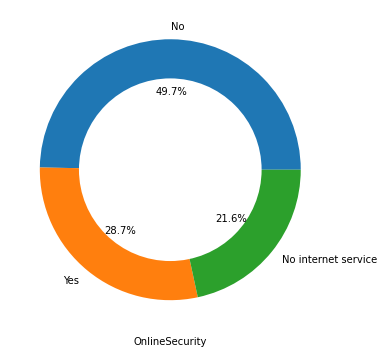

<Figure size 432x288 with 0 Axes>

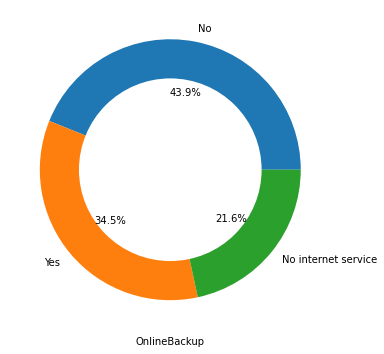

<Figure size 432x288 with 0 Axes>

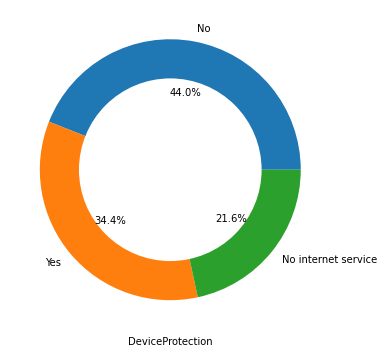

<Figure size 432x288 with 0 Axes>

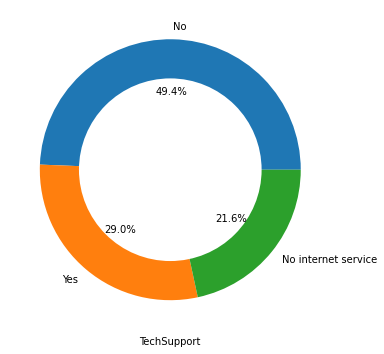

<Figure size 432x288 with 0 Axes>

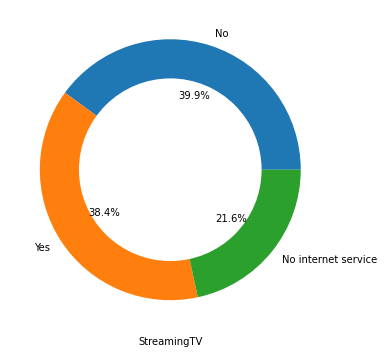

<Figure size 432x288 with 0 Axes>

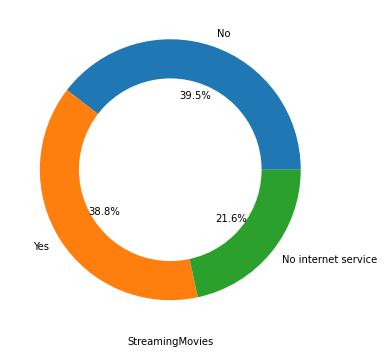

<Figure size 432x288 with 0 Axes>

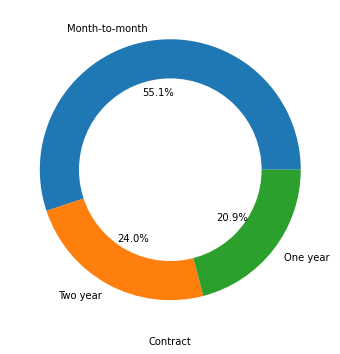

<Figure size 432x288 with 0 Axes>

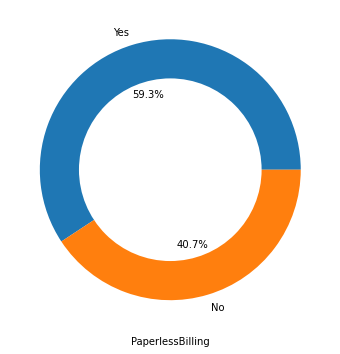

<Figure size 432x288 with 0 Axes>

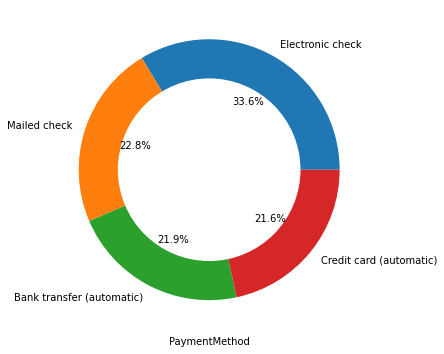

<Figure size 432x288 with 0 Axes>

In [21]:
for i in categ:
        plt.figure(figsize=(8,6))
        data[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()


conclusion:

1. 50.5% are males and 49.5% are females.
2. most of are young generation senior citizens are very less.
3. 51.7% having no partner.
4. 70.2% having no dependents.
5. large no. of people having phone service.
6. 48.1% not having multiple lines, 9.7% not having no phone service.
7. most of the people having fiberoptics internet service followed by dsl and 21.6% having no internet service.
8. most people not having any online security.
9. most people not having online backup.
10. most people not having device protection , 34.4% having device protection.
11. approx.50% not having techsupport.
12. streaming tv having approx same yes and no.
13. same as streaming tv streaming movies having same yes and no. those who are streaming tv can stream movies as well .
14. around 55% people contract mont to month.
15. 59 % people do papaerless billing.
16. most people do electronic check payment followed by mailed check and bank transfer.

# Now we will analysis the features in terms of target.

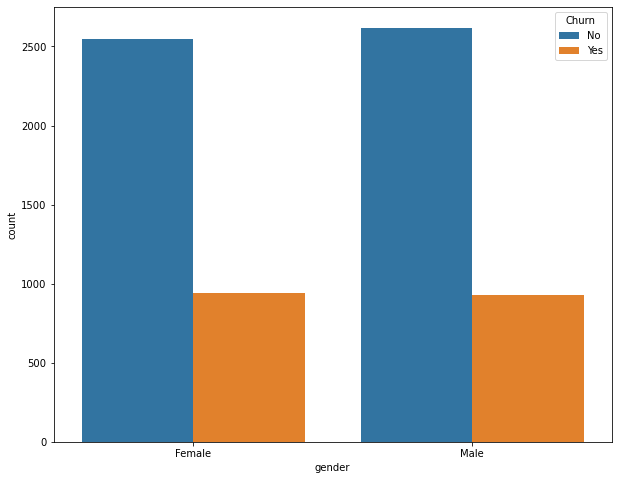

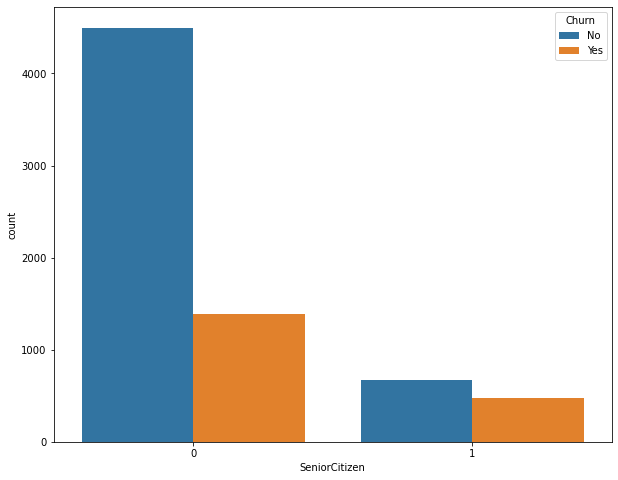

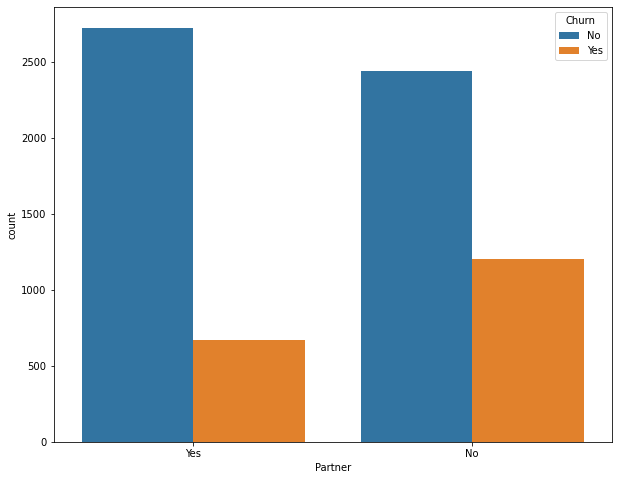

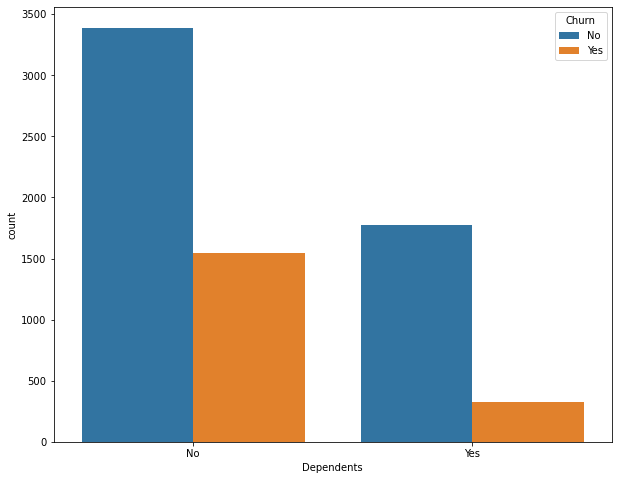

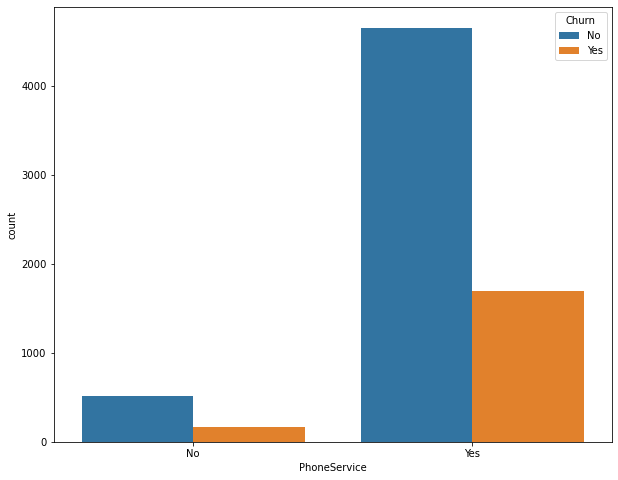

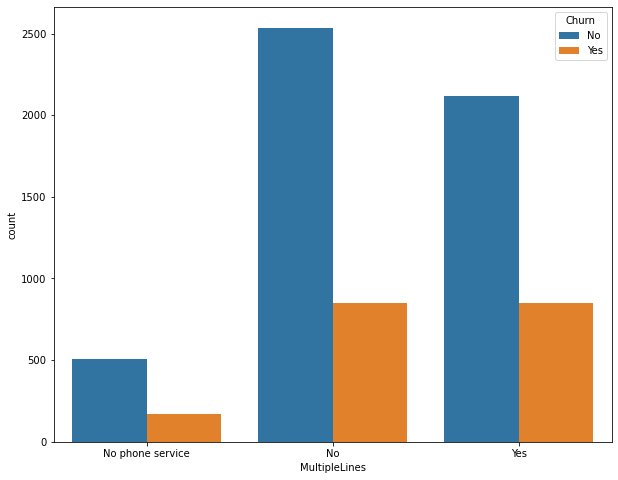

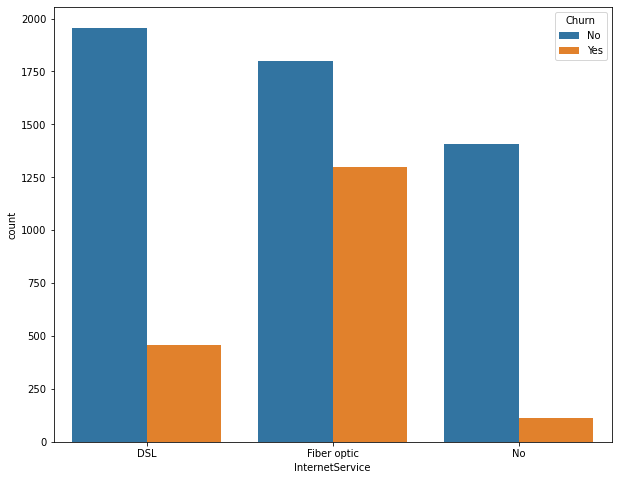

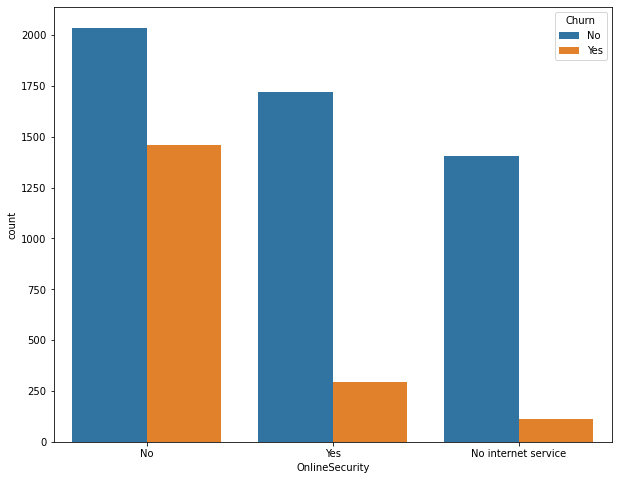

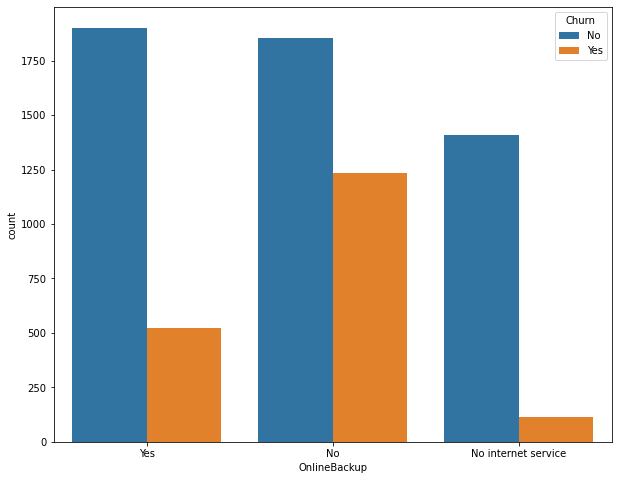

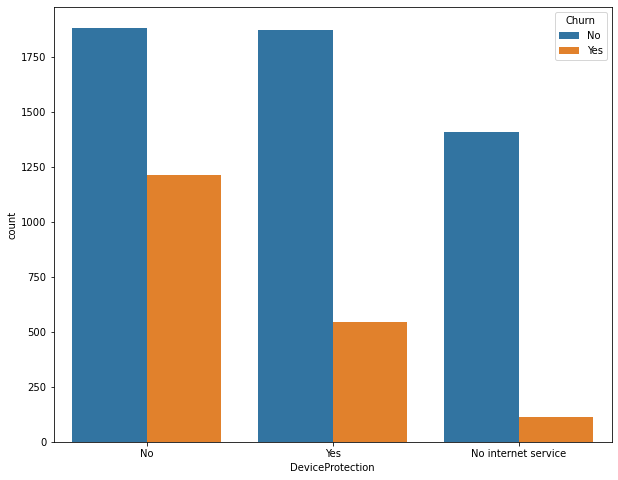

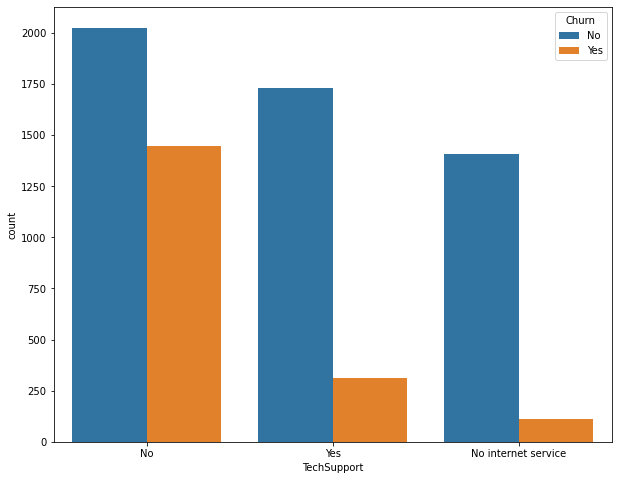

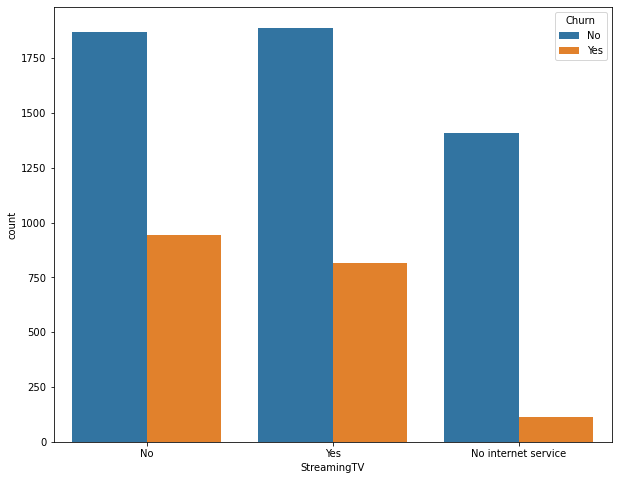

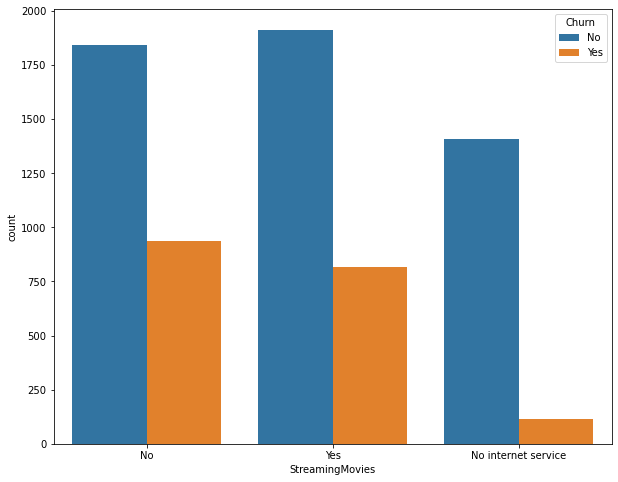

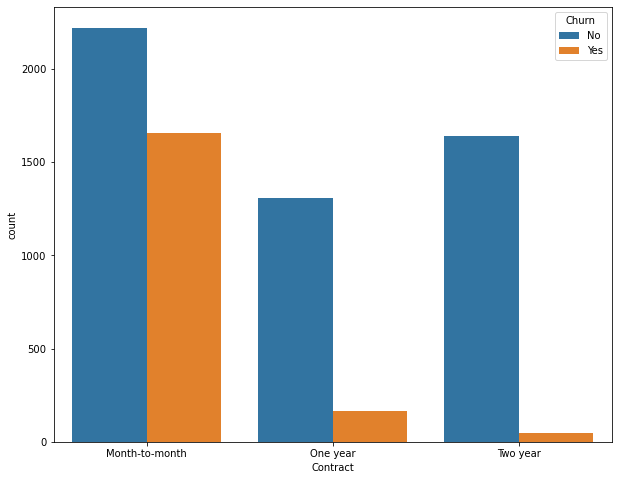

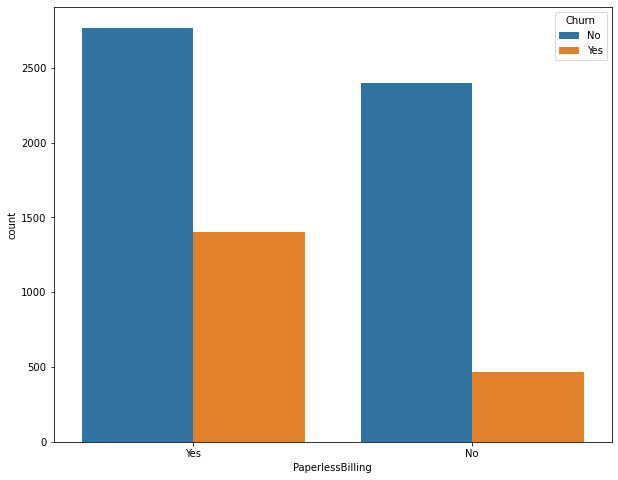

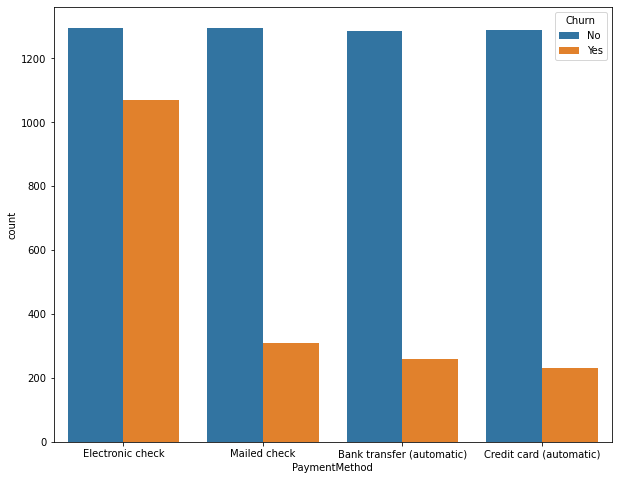

In [22]:
for i in categ:
    plt.figure(figsize=(10,8))
    sns.countplot(data[i],hue=data['Churn'])

# Relationship between monthly charges and total charges:

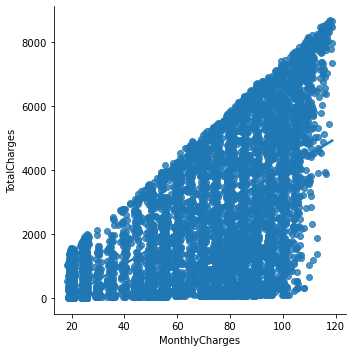

In [23]:
sns.lmplot(data=data,x='MonthlyCharges',y= 'TotalCharges')

as expected as the monthly charges increases total charges also increases.

# Churn by Monthly Charges and Total Charges :

Text(0.5, 1.0, 'Monthly Charges By Churn')

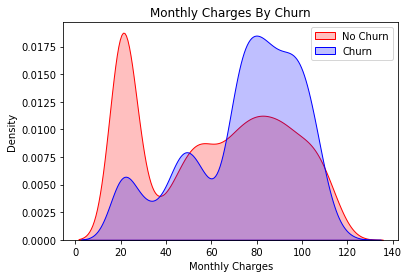

In [24]:
mtc = sns.kdeplot(data.MonthlyCharges[(data["Churn"]=='No')],color="Red",shade=True)
mtc = sns.kdeplot(data.MonthlyCharges[(data["Churn"]=='Yes')],ax=mtc,color="Blue",shade=True)
mtc.legend(["No Churn","Churn"],loc='upper right')
mtc.set_ylabel("Density")
mtc.set_xlabel("Monthly Charges")
mtc.set_title("Monthly Charges By Churn")

Churn is high when monthly charges are high.

Text(0.5, 1.0, 'Total Charges By Churn')

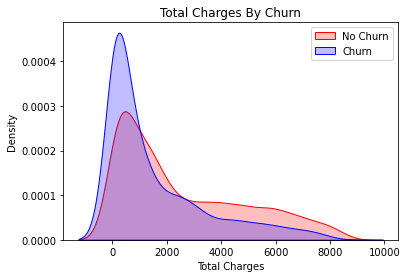

In [25]:
mtc = sns.kdeplot(data.TotalCharges[(data["Churn"]=='No')],color="Red",shade=True)
mtc = sns.kdeplot(data.TotalCharges[(data["Churn"]=='Yes')],ax=mtc,color="Blue",shade=True)
mtc.legend(["No Churn","Churn"],loc='upper right')
mtc.set_ylabel("Density")
mtc.set_xlabel("Total Charges")
mtc.set_title("Total Charges By Churn")

high churn at low total charges. which is surprising.

High chrun seen in case of month to month contracts.No online security.No tech support. First year of subscription and Fiber Optics internet.

Low churn is seen in case of long term contracts,Subscriptions without Internet service and the customer engaged for 5+ years.

Factors like Gender, Avalibility of phone service and multiple lines have almost No impact on churn.

<AxesSubplot:>

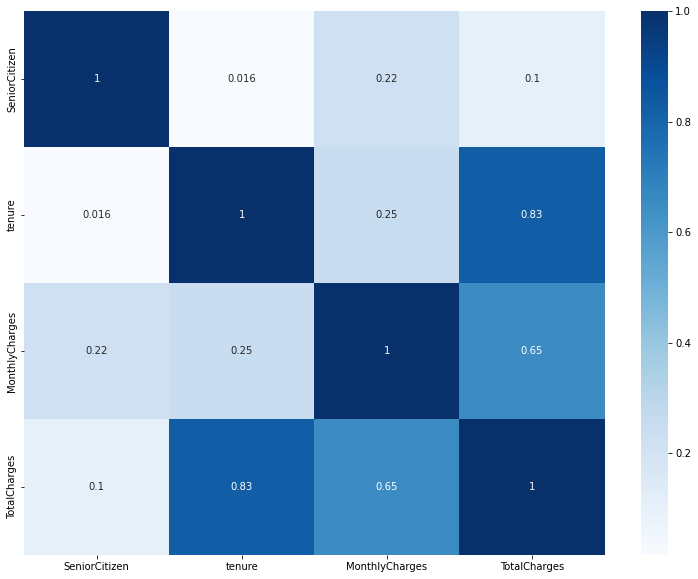

In [26]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

High correlation seen between tenure and Total charges.

In [27]:
data.drop('customerID',axis=1,inplace=True)

In [28]:
contin=['tenure','MonthlyCharges','TotalCharges']

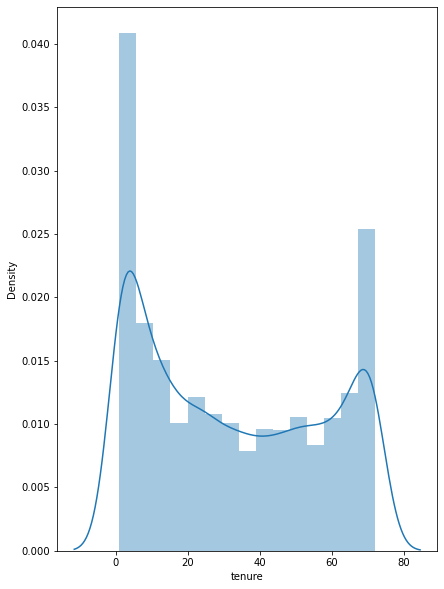

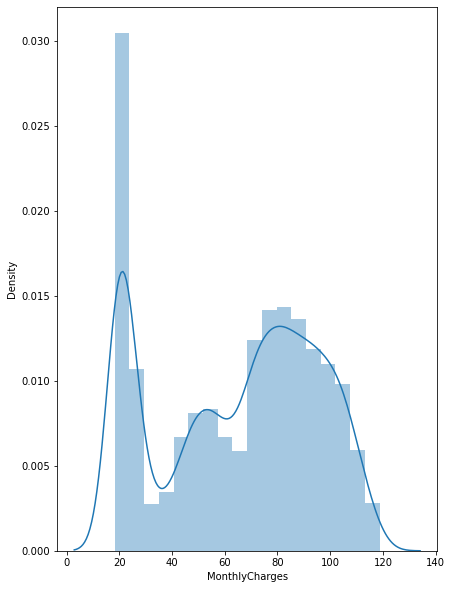

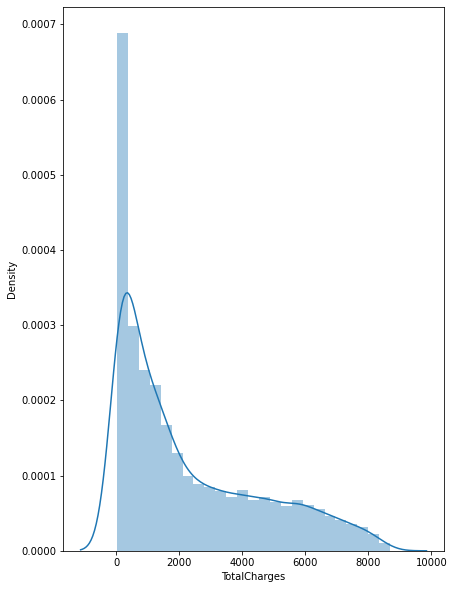

In [29]:
for i in contin :
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,2)
    sns.distplot(data[i])
plt.show()    


Not so much of skewness continous feature is evenly distributed good to go.

In [30]:
#relacing chrun with 0 and 1

data = data.replace(["No", "Yes"], [0, 1], regex = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [31]:
#blancing the data using undersampling

count1, count0 = data.Churn.value_counts()
data0 = data[data['Churn'] == 1]
data1 = data[data['Churn'] == 0]
data1_under = data1.sample(count0)
newData = pd.concat([data1_under, data0], axis=0)

<AxesSubplot:xlabel='Churn', ylabel='count'>

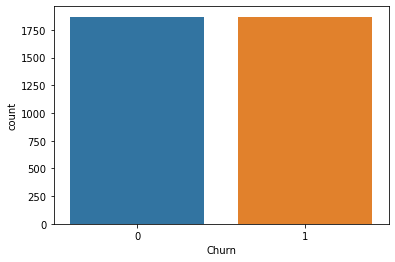

In [32]:
sns.countplot(newData["Churn"])

Now it is perfectly balanced. 

In [33]:
newData=data

In [34]:
dummy1 = pd.get_dummies(data[['gender', 'InternetService', 'Contract', 'PaymentMethod']], drop_first=True)

# Adding the results to the dataframe
data= pd.concat([data, dummy1], axis=1)

In [35]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,gender_Male,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,0,DSL,0,1,...,29.85,0,0,1,0,0,0,0,1,0
1,Male,0,0,0,34,1,0,DSL,1,0,...,1889.50,0,1,1,0,1,0,0,0,1
2,Male,0,0,0,2,1,0,DSL,1,1,...,108.15,1,1,1,0,0,0,0,0,1
3,Male,0,0,0,45,0,0,DSL,1,0,...,1840.75,0,1,1,0,1,0,0,0,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,...,151.65,1,0,0,1,0,0,0,1,0


In [36]:
data=data.drop(['gender', 'InternetService', 'Contract', 'PaymentMethod'],1)

In [37]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,1,1,0,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,1,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,1,1,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,0,0,1,0,0,0,1,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   MultipleLines                          7032 non-null   int64  
 6   OnlineSecurity                         7032 non-null   int64  
 7   OnlineBackup                           7032 non-null   int64  
 8   DeviceProtection                       7032 non-null   int64  
 9   TechSupport                            7032 non-null   int64  
 10  StreamingTV                            7032 non-null   int64  
 11  Stre

All the features are now converted to int and float.

In [39]:
#scaling the data

from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()

In [41]:
X = data.drop('Churn', 1)
y= data['Churn']

In [42]:
X= scaler.fit_transform(X)

# Model Building

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,roc_curve
from sklearn.tree import DecisionTreeClassifier

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=22)

In [45]:
#definig the function for train and test the model:

def metric_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train :
        y_pred=clf.predict(X_train)
        print("\n**********************************Train Result***************************************")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:2f}%")
    elif train == False :
        pred = clf.predict(X_test)
        print("\n**********************************Test Result****************************************")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

# Knn Model:

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
metric_score(knn,X_train,X_test,y_train,y_test,train=True)
metric_score(knn,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:83.522943%

**********************************Test Result****************************************
Accuracy Score:75.824801%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1292
           1       0.55      0.50      0.52       466

    accuracy                           0.76      1758
   macro avg       0.69      0.68      0.68      1758
weighted avg       0.75      0.76      0.75      1758



# Random Forest Classifier Model:

In [49]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [50]:
metric_score(rfc,X_train,X_test,y_train,y_test,train=True)
metric_score(rfc,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:99.810391%

**********************************Test Result****************************************
Accuracy Score:79.863481%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1292
           1       0.66      0.49      0.56       466

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758



# Decision Tree Model :

In [51]:
DT = DecisionTreeClassifier()

In [52]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
metric_score(DT,X_train,X_test,y_train,y_test,train=True)
metric_score(DT,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:99.810391%

**********************************Test Result****************************************
Accuracy Score:73.435722%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1292
           1       0.50      0.50      0.50       466

    accuracy                           0.73      1758
   macro avg       0.66      0.66      0.66      1758
weighted avg       0.73      0.73      0.73      1758



# checking cross validation scores if our model is underfitting or overfitting 


In [54]:
from sklearn.model_selection import KFold,cross_val_score


In [55]:
cross_val_score(knn,X ,y ,cv=7)

array([0.76119403, 0.77313433, 0.75124378, 0.74427861, 0.77091633,
       0.75099602, 0.77988048])

In [56]:
cross_val_score(KNeighborsClassifier(),X,y,cv=7).mean()

0.7616633678505593

In [57]:
cross_val_score(rfc,X ,y ,cv=5).mean()

0.7906708077171549

In [58]:
cross_val_score(DT,X ,y ,cv=5).mean()

0.7310860855244201

# HyperParameter Tunning:

In [59]:
from sklearn.model_selection import GridSearchCV

# Knn Tunning

In [60]:
param_grid={'algorithm':['kd_tree','brute'],'leaf_size':[3,5,6,7,8],'n_neighbors':[3,5,7,9,11,13]}

In [61]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [62]:
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [63]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 11}

In [64]:
knn = KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=11)

In [65]:
metric_score(knn,X_train,X_test,y_train,y_test,train=True)
metric_score(knn,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:81.095942%

**********************************Test Result****************************************
Accuracy Score:77.019340%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1292
           1       0.58      0.49      0.53       466

    accuracy                           0.77      1758
   macro avg       0.70      0.68      0.69      1758
weighted avg       0.76      0.77      0.76      1758



# Random Forest Tunning:

In [66]:
from sklearn.model_selection import RandomizedSearchCV


In [67]:
param_grid={'n_estimators':[100, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8]}

In [68]:
randomsearch=RandomizedSearchCV(RandomForestClassifier(),param_grid,cv=10)


In [69]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500]})

In [70]:
randomsearch.best_params_

{'n_estimators': 300,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 7}

In [71]:
rfc=RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=4,n_estimators=300)

In [72]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=300)

In [73]:
metric_score(rfc,X_train,X_test,y_train,y_test,train=True)
metric_score(rfc,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:82.878271%

**********************************Test Result****************************************
Accuracy Score:80.091013%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1292
           1       0.68      0.48      0.56       466

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758



# Decision Tree Tunning:

In [74]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':range(10,15),
           'min_samples_leaf':range(2,6),
           'min_samples_split':range(3,8),
           'max_leaf_nodes':range(5,10)}

In [75]:
gridsearch=GridSearchCV(estimator=DT,param_grid=param_grid,cv=5,n_jobs=-1)

In [76]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [77]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [78]:
DT=DecisionTreeClassifier(criterion='gini',min_samples_split=3,max_depth=10,max_leaf_nodes=5,min_samples_leaf=2)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5, min_samples_leaf=2,
                       min_samples_split=3)

In [79]:
metric_score(DT,X_train,X_test,y_train,y_test,train=True)
metric_score(DT,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:79.010239%

**********************************Test Result****************************************
Accuracy Score:78.953356%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1292
           1       0.68      0.38      0.49       466

    accuracy                           0.79      1758
   macro avg       0.75      0.66      0.68      1758
weighted avg       0.78      0.79      0.77      1758



# Finding Area Under The Roc Curve:

In [80]:
y_pred=DT.predict(X_test)

In [81]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [82]:
print('Threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False positive Rate=',fpr)

Threshold= [2 1 0]
True Positive Rate= [0.         0.38412017 1.        ]
False positive Rate= [0.         0.06424149 1.        ]


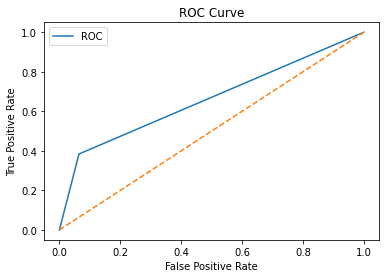

In [83]:
plt.plot(fpr,tpr,label='ROC')
plt.plot([0, 1],[0, 1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [84]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.6599393428028542


In [85]:
y_pred=rfc.predict(X_test)

In [86]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [87]:
print('Threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False positive Rate=',fpr)

Threshold= [2 1 0]
True Positive Rate= [0.         0.47639485 1.        ]
False positive Rate= [0.         0.08204334 1.        ]


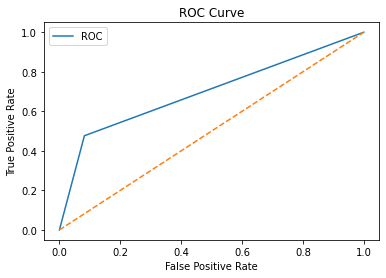

In [88]:
plt.plot(fpr,tpr,label='ROC')
plt.plot([0, 1],[0, 1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [89]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.6971757530660785


In [90]:
y_pred=knn.predict(X_test)

In [91]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [92]:
print('Threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False positive Rate=',fpr)

Threshold= [2 1 0]
True Positive Rate= [0.         0.48927039 1.        ]
False positive Rate= [0.         0.12848297 1.        ]


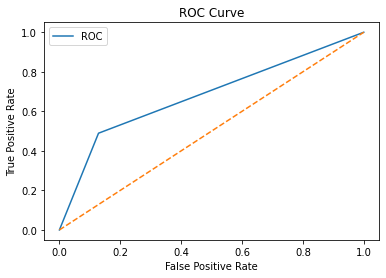

In [93]:
plt.plot(fpr,tpr,label='ROC')
plt.plot([0, 1],[0, 1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [94]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.6803937070649358


Finalizing Random Forest Classifier Model as seen above accuracy which is 80% is more than other models and area under the curve is also 69%.

In [95]:
final_model = RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=4,n_estimators=300)

In [96]:
final_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=300)

In [97]:
import joblib

In [98]:
joblib.dump(final_model,'Churn Project')

['Churn Project']